<a href="https://colab.research.google.com/github/DrStephPowers/BIA/blob/main/Ch10_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

## Logistic Regression

In [ ]:
!pip install palmerpenguins

In [ ]:
from palmerpenguins import load_penguins

In [ ]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
penguins['Adelie'] = penguins['species']
penguins['Adelie'].replace({'Adelie': 1, 'Gentoo': 0, 'Chinstrap': 0}, inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,Adelie
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1


In [ ]:
penguins['Gentoo'] = penguins['species']
penguins['Gentoo'].replace({'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 0}, inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,Adelie,Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1,0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1,0


In [ ]:
penguins = penguins.dropna()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(penguins[["bill_length_mm", "flipper_length_mm"]],
                                                   penguins[["Gentoo"]], test_size=0.2, stratify=penguins[["Gentoo"]], shuffle=True)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0])

In [ ]:
lr.coef_

array([[-0.27560646,  0.74198658]])

In [ ]:
lr.intercept_

array([-141.14890573])

logit (prob of Gentoo) = log(prob of Gentoo / 1-prob of Gentoo) = B0 + B1 x_1 + B2 x_2

Odds of being an Gentoo penguin: \\
decrease by 24% [exp(-0.2756) = 0.759] with longer bill_length_mm   \\
increase by 210% [exp(0.7420) = 2.10] with longer flipper_length_mm \\

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9701492537313433

In [ ]:
recall_score(y_test, y_pred)

0.9583333333333334

In [ ]:
precision_score(y_test, y_pred)

0.9583333333333334

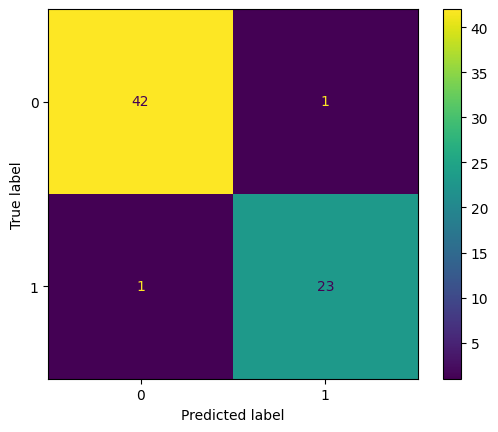

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
train = pd.concat([x_train, y_train], axis=1)

In [ ]:
train.head()

,bill_length_mm,flipper_length_mm,Gentoo
163,49.0,216.0,1
26,40.6,183.0,0
179,47.8,215.0,1
334,50.2,202.0,0
312,47.6,195.0,0


In [ ]:
log_reg = smf.logit("Gentoo ~ bill_length_mm + flipper_length_mm", data=train).fit()

Optimization terminated successfully.
         Current function value: 0.064883
         Iterations 11


In [ ]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Gentoo   No. Observations:                  266
Model:                          Logit   Df Residuals:                      263
Method:                           MLE   Df Model:                            2
Date:                Mon, 19 Aug 2024   Pseudo R-squ.:                  0.9004
Time:                        15:42:08   Log-Likelihood:                -17.259
converged:                       True   LL-Null:                       -173.37
Covariance Type:            nonrobust   LLR p-value:                 1.596e-68
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -129.5921     28.748     -4.508      0.000    -185.937     -73.247
bill_length_mm       -0.2104      0.122     -1.725      0.085      -0.450       0.029
flipper_length_mm     0.6735      0.150      4.502      0.000       0.380       0.967
=====================================================================================

Possibly complete quasi-separation: A fraction 0.42 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

logit (prob of Gentoo) = log(prob of Gentoo / 1-prob of Gentoo) = B0 + B1 x_1 + B2 x_2

Odds of being an Gentoo penguin: \\
decrease by 19% [exp(-0.2104) = 0.81] with longer bill_length_mm   \\
increase by 196% [exp(0.6735) = 1.96] with longer flipper_length_mm \\

In [ ]:
from scipy.stats import pearsonr

pearsonr(penguins["bill_length_mm"], penguins["flipper_length_mm"])

PearsonRResult(statistic=0.653095638667086, pvalue=7.211340708097371e-42)

In [ ]:
log_reg = smf.logit("Gentoo ~ flipper_length_mm", data=train).fit()

Optimization terminated successfully.
         Current function value: 0.071542
         Iterations 11


In [ ]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Gentoo   No. Observations:                  266
Model:                          Logit   Df Residuals:                      264
Method:                           MLE   Df Model:                            1
Date:                Mon, 19 Aug 2024   Pseudo R-squ.:                  0.8902
Time:                        15:46:29   Log-Likelihood:                -19.030
converged:                       True   LL-Null:                       -173.37
Covariance Type:            nonrobust   LLR p-value:                 4.246e-69
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -125.4610     27.089     -4.632      0.000    -178.554     -72.368
flipper_length_mm     0.6070      0.130      4.652      0.000       0.351       0.863
=====================================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Should other variables be included in the model?

Create a logistic regression model to predict whether the pengiun is Adelie

## Poisson Regression

In [134]:
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split

In [135]:
url = "http://www.stat.columbia.edu/~gelman/arm/examples/police/frisk_with_noise.dat"
frisk = pd.read_csv(url, skiprows=6, delimiter=" ")

Dataset from Andrew Gelman, Jeffrey Fagan & Alex Kiss (2007) An Analysis of the New York City Police Department’s “Stop-and-Frisk” Policy in the Context of Claims of Racial Bias, Journal of the American Statistical Association, 102:479, 813-823.

stops: The number of police stops between January 1998 and March 1999, for each combination of precinct, ethnicity and type of crime.
pop: The population.

past.arrests: The number of arrests that took place in 1997 for each combination of precinct, ethnicity and type of crime.

precinct: Index for the precinct (1-75).

eth: Indicator for ethnicity, black (1), hispanic (2), white (3).

crime: Indicator for the type, violent (1), weapons (2), property (3), drug (4).

In [136]:
frisk

,stops,pop,past.arrests,precinct,eth,crime
0,75,1720,191,1,1,1
1,36,1720,57,1,1,2
2,74,1720,599,1,1,3
3,17,1720,133,1,1,4
4,37,1368,62,1,2,1
...,...,...,...,...,...,...
895,2,3233,4,75,2,4
896,111,61692,181,75,3,1
897,48,61692,38,75,3,2
898,115,61692,61,75,3,3


In [137]:
frisk['black'] = frisk['eth']
frisk['black'].replace({1:1, 2:0, 3:0}, inplace=True)
frisk.head()

,stops,pop,past.arrests,precinct,eth,crime,black
0,75,1720,191,1,1,1,1
1,36,1720,57,1,1,2,1
2,74,1720,599,1,1,3,1
3,17,1720,133,1,1,4,1
4,37,1368,62,1,2,1,0


In [138]:
frisk['hispanic'] = frisk['eth']
frisk['hispanic'].replace({1:0, 2:1, 3:0}, inplace=True)
frisk.head()

,stops,pop,past.arrests,precinct,eth,crime,black,hispanic
0,75,1720,191,1,1,1,1,0
1,36,1720,57,1,1,2,1,0
2,74,1720,599,1,1,3,1,0
3,17,1720,133,1,1,4,1,0
4,37,1368,62,1,2,1,0,1


In [139]:
frisk['drug'] = frisk['crime']
frisk['drug'].replace({1:0, 2:0, 3:0, 4:1}, inplace=True)
frisk.head()

,stops,pop,past.arrests,precinct,eth,crime,black,hispanic,drug
0,75,1720,191,1,1,1,1,0,0
1,36,1720,57,1,1,2,1,0,0
2,74,1720,599,1,1,3,1,0,0
3,17,1720,133,1,1,4,1,0,1
4,37,1368,62,1,2,1,0,1,0


In [140]:
frisk['weapon'] = frisk['crime']
frisk['weapon'].replace({1:0, 2:1, 3:0, 4:0}, inplace=True)
frisk.head()

,stops,pop,past.arrests,precinct,eth,crime,black,hispanic,drug,weapon
0,75,1720,191,1,1,1,1,0,0,0
1,36,1720,57,1,1,2,1,0,0,1
2,74,1720,599,1,1,3,1,0,0,0
3,17,1720,133,1,1,4,1,0,1,0
4,37,1368,62,1,2,1,0,1,0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(frisk[["black", "drug"]],
                                                   frisk[["stops"]], test_size=0.2, shuffle=True)

In [141]:
pois = PoissonRegressor()

In [142]:
pois.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PoissonRegressor()

In [ ]:
pois.coef_

array([ 0.7833349 , -0.96872944])

In [ ]:
pois.intercept_

4.8295393452564825

The average observed count is equal to exp(B0 + B1 X_1 + B2 X_2)

The average number of stops is 125 [exp(4.830) = 125.14] \\
Blacks have 2.38 times [exp(0.783) = 2.188] more stops than non-Blacks. \\
Drug crimes are associated with 62% less stops [exp(-0.969) = 0.380] than other types of crime.

In [143]:
y_pred = pois.predict(x_test)

In [144]:
y_test = y_test.to_numpy()

In [145]:
error = np.subtract(y_test, y_pred)

In [146]:
error.mean()

-8.09437771479122

In [147]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

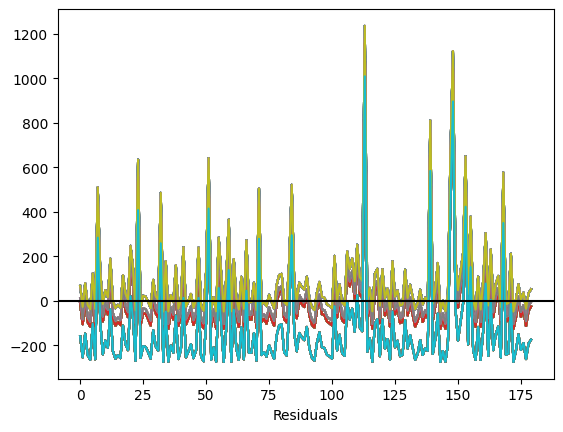

In [148]:
plt.plot(error)
plt.xlabel('Residuals')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

In [149]:
import statsmodels.formula.api as smf

In [150]:
train2 = pd.concat([x_train, y_train], axis=1)

In [151]:
train2.head()

,black,drug,stops
880,0,0,55
537,0,0,6
828,1,0,283
886,0,0,288
613,1,0,630


In [152]:
pois_reg = smf.poisson("stops ~ black + drug", data=train2).fit()

Optimization terminated successfully.
         Current function value: 85.552264
         Iterations 6


In [153]:
pois_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                  stops   No. Observations:                  720
Model:                        Poisson   Df Residuals:                      717
Method:                           MLE   Df Model:                            2
Date:                Mon, 19 Aug 2024   Pseudo R-squ.:                  0.2026
Time:                        22:36:51   Log-Likelihood:                -61598.
converged:                       True   LL-Null:                       -77246.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8259      0.005   1050.816      0.000       4.817       4.835
black          0.8042      0.006    130.795      0.000       0.792       0.816
drug          -1.0363      0.010   -103.622      0.000      -1.056      -1.017
==============================================================================
"""

Can you create a Poisson regression model that better predicts the number of arrests? Practice hot encoding. But remember that you can't include all of the hot encoded variables from a nominal variable because they will be highly correlated.

## Linear Regression

In [154]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NYSE Dataset from https://www.kaggle.com/datasets/dgawlik/nyse

In [155]:
stock = pd.read_csv('/content/drive/MyDrive/BI BA Handbook/Chapter 10/fundamentals.csv')

In [156]:
stock.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [158]:
stock2 = stock[["Earnings Per Share", "Cash Ratio", "After Tax ROE", "Gross Margin", "Current Ratio"]].dropna()

In [159]:
x_train, x_test, y_train, y_test = train_test_split(stock2[["Cash Ratio", "After Tax ROE", "Gross Margin", "Current Ratio"]],
                                                   stock2[["Earnings Per Share"]], test_size=0.2, shuffle=True)

In [160]:
lr = LinearRegression()

In [161]:
lr.fit(x_train, y_train)

LinearRegression()

In [162]:
lr.coef_

array([[ 0.00450765, -0.00082067, -0.01060515, -0.0013361 ]])

In [163]:
lr.intercept_

array([3.85590308])

y = B0 + B1 x1 + B2 x2 + B3 x3 + B4 x4 + B5 x5

average EPS is 3.8

EPS increases by 0.003 for 1 unit increase in cash ratio \\
EPS decreases by -0.001 for 1 unit increase in after tax ROE \\
EPS decreases by -0.011 for % increase in gross margin \\
EPS decreases by -0.0002 for % increase in current ratio

In [164]:
y_pred = lr.predict(x_test)

In [165]:
mean_squared_error(y_test, y_pred)

31.41692658963815

In [166]:
r2_score(y_test, y_pred)

-0.007648754919501233

In [167]:
y_test = y_test.to_numpy()

In [168]:
error = np.subtract(y_test, y_pred)

In [169]:
error.mean()

-0.440909887926909

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

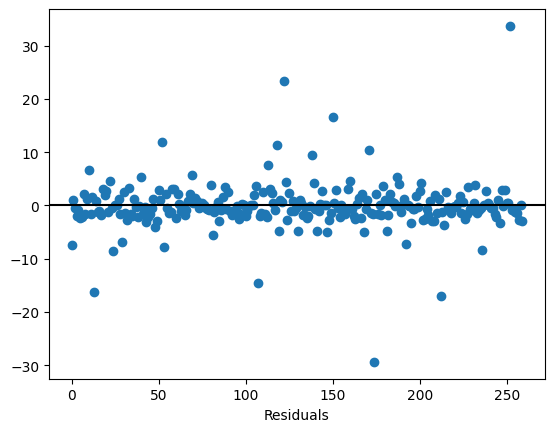

In [ ]:
plt.plot(error, marker = 'o', linestyle="None")
plt.xlabel('Residuals')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

In [170]:
train3 = pd.concat([x_train, y_train], axis=1)

In [171]:
reg = train3.rename(columns = {'Earnings Per Share':'EPS', 'After Tax ROE': "ROE", "Current Ratio": "Current", 'Gross Margin': 'Gross', 'Cash Ratio': 'Cash'})

In [172]:
reg.head()

,Cash,ROE,Gross,Current,EPS
893,10.0,23.0,35.0,77.0,1.76
1152,9.0,43.0,74.0,90.0,-8.80
137,41.0,7.0,80.0,135.0,5.53
488,17.0,29.0,100.0,85.0,6.47
154,34.0,2.0,20.0,144.0,0.21


In [173]:
ols_reg = smf.ols("EPS ~ Cash + ROE + Gross + Current", data=reg).fit()

In [174]:
ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EPS   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.724
Date:                Mon, 19 Aug 2024   Prob (F-statistic):              0.142
Time:                        23:02:22   Log-Likelihood:                -3113.0
No. Observations:                1039   AIC:                             6236.
Df Residuals:                    1034   BIC:                             6261.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8559      0.477      8.085      0.000       2.920       4.792
Cash           0.0045      0.003      1.449      0.148      -0.002       0.011
ROE           -0.0008      0.001     -1.486      0.138      -0.002       0.000
Gross         -0.0106      0.007     -1.451      0.147      -0.025       0.004
Current       -0.0013      0.002     -0.560      0.576      -0.006       0.003
==============================================================================
Omnibus:                      371.587   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106462.825
Skew:                           0.149   Prob(JB):                         0.00
Kurtosis:                      52.589   Cond. No.                         914.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
stock2 = stock[["Earnings Per Share", "For Year", "Cash Ratio", "After Tax ROE", "Gross Margin", "Current Ratio"]].dropna()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(stock2[["For Year", "Cash Ratio", "After Tax ROE", "Gross Margin", "Current Ratio"]],
                                                   stock2[["Earnings Per Share"]], test_size=0.2)

In [ ]:
train4 = pd.concat([x_train, y_train], axis=1)

In [ ]:
reg = train4.rename(columns = {'Earnings Per Share':'EPS', 'For Year': "Year", 'After Tax ROE': "ROE", "Current Ratio": "Current", 'Gross Margin': 'Gross', 'Cash Ratio': 'Cash'})

In [ ]:
ols_reg = smf.ols("EPS ~ ROE*Year", data=reg).fit()

In [ ]:
ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EPS   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.304
Date:                Mon, 19 Aug 2024   Prob (F-statistic):             0.0197
Time:                        16:34:36   Log-Likelihood:                -3145.0
No. Observations:                1039   AIC:                             6298.
Df Residuals:                    1035   BIC:                             6318.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -90.4903     34.797     -2.601      0.009    -158.771     -22.210
ROE            3.8585      1.407      2.743      0.006       1.098       6.619
Year           0.0466      0.017      2.694      0.007       0.013       0.080
ROE:Year      -0.0019      0.001     -2.743      0.006      -0.003      -0.001
==============================================================================
Omnibus:                      358.583   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79755.686
Skew:                          -0.181   Prob(JB):                         0.00
Kurtosis:                      45.920   Cond. No.                     1.18e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

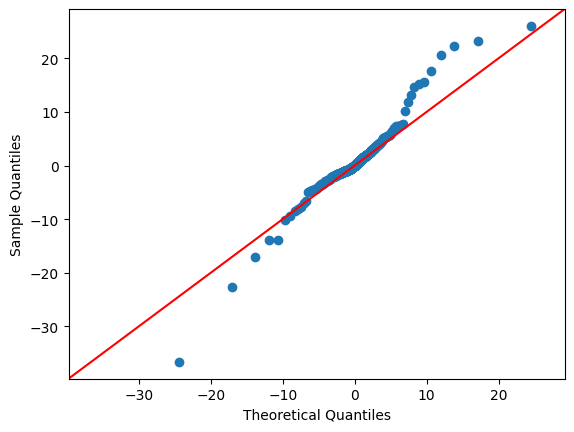

In [ ]:
res = ols_reg.resid

fig = sm.qqplot(res, stats.t, fit=True, line='45')
plt.show()

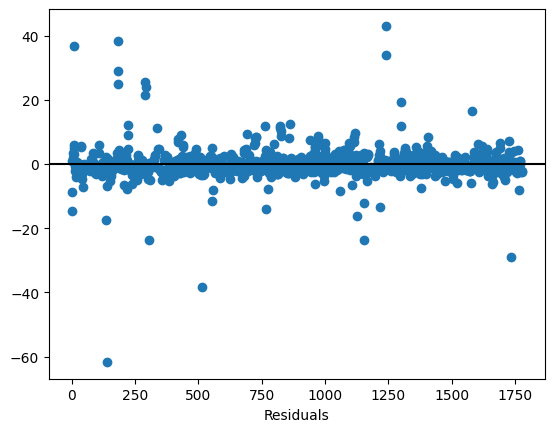

In [ ]:
plt.plot(res, marker = 'o', linestyle="None")
plt.xlabel('Residuals')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
wine = pd.read_csv('/content/drive/MyDrive/BI BA Handbook/Chapter 10/winequalitywhite.csv', sep=';')

In [177]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [184]:
wine = wine.rename(columns = {'fixed acidity':'acid', 'volatile acidity': "volacid", 'citric acid': "citric", "residual sugar": "sugar", 'free sulfur dioxide': 'freesulfur', 'total sulfur dioxide': 'totsulfer'})

In [178]:
wine2 = wine.drop(columns ="quality")

In [179]:
wine2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


### Ridge Regression

Alpha = how much the variance of the estimates are reduced

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(wine2, wine["quality"], test_size=0.2)

In [ ]:
ridge = Ridge(alpha=20)

In [ ]:
ridge.fit(x_train, y_train)

Ridge(alpha=20)

In [ ]:
ridge.coef_

array([-0.05687221, -1.30375733,  0.04088316,  0.02598924, -0.08304457,
        0.00512351, -0.0013088 , -0.00945973,  0.13489854,  0.31713427,
        0.36217832])

In [ ]:
ridge.intercept_

2.069771301118126

In [ ]:
y_pred = ridge.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred)

0.5863232621410638

In [ ]:
ridge.score(x_test, y_test)

0.248330602251014

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
alphas = np.arange(1,100,5)
alphas

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])

In [ ]:
ridgecv = RidgeCV(alphas = alphas)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]))

In [ ]:
ridgecv.coef_

array([-5.88191567e-02, -1.96953937e+00, -2.93211773e-02,  2.70556996e-02,
       -4.75190194e-01,  4.14227611e-03, -8.30380010e-04, -1.82812249e-01,
        1.20549104e-01,  4.14463594e-01,  3.69347508e-01])

In [ ]:
ridgecv.intercept_

2.366217343889216

In [ ]:
y_pred = ridge.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred)

0.5863232621410638

In [ ]:
ridge.score(x_train, y_train)

0.2708952624719989

In [ ]:
ridge.score(x_test, y_test)

0.248330602251014

In [ ]:
error = np.subtract(y_pred, y_test)

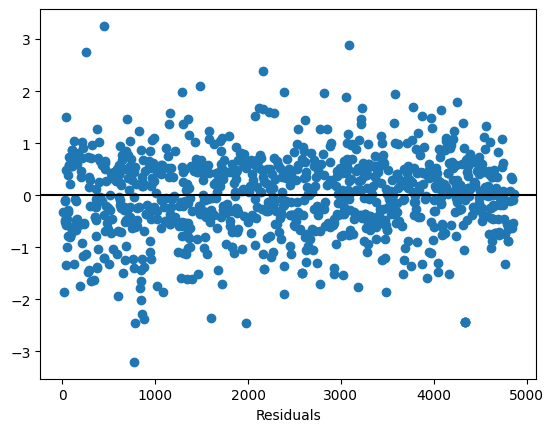

In [ ]:
plt.plot(error, marker="o", linestyle="None")
plt.xlabel('Residuals')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

In [ ]:
import scipy.stats as stats

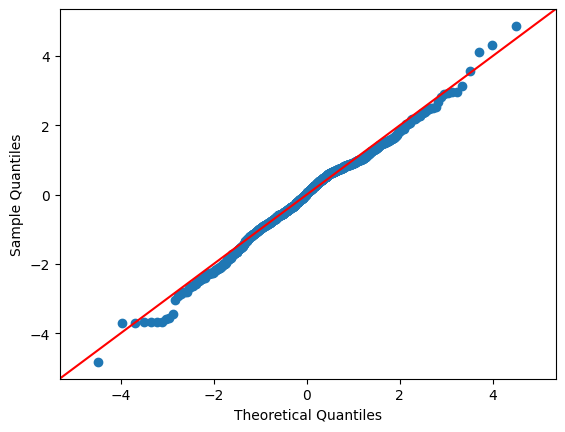

In [ ]:
fig = sm.qqplot(error, stats.t, fit=True, line='45')
plt.show()

### Lasso Regression

 Alpha - how much the variance of the estimates are reduced

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=2)

In [ ]:
lasso.fit(x_train, y_train)

Lasso(alpha=2)

In [ ]:
lasso.coef_

array([-0.       , -0.       ,  0.       , -0.       , -0.       ,
        0.       , -0.0026614, -0.       ,  0.       ,  0.       ,
        0.       ])

In [ ]:
lasso.intercept_

6.243563907802785

In [ ]:
y_pred = lasso.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred)

0.7636244725299555

In [ ]:
lasso.score(x_train, y_train)

0.03009262873137908

In [ ]:
lasso.score(x_test, y_test)

0.021029550700511823

In [ ]:
error = np.subtract(y_test, y_pred)

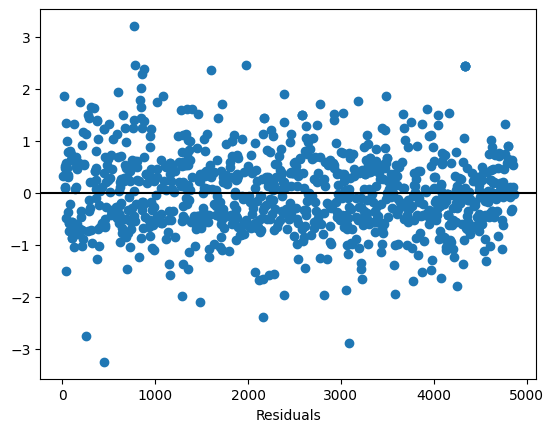

In [ ]:
plt.plot(error, marker="o", linestyle="None")
plt.xlabel('Residuals')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lassocv = LassoCV(cv = 5)
lassocv.fit(x_train, y_train)

LassoCV(cv=5)

In [ ]:
lassocv.coef_

array([-5.73884616e-02, -1.30928359e+00,  0.00000000e+00,  2.38164254e-02,
       -0.00000000e+00,  5.04693730e-03, -1.09277314e-03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.59355292e-01])

In [ ]:
lassocv.intercept_

2.676832849642194

In [ ]:
y_pred = lassocv.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred)

0.59050252738461

In [ ]:
lassocv.score(x_train, y_train)

0.26693639927381796

In [ ]:
lassocv.score(x_test, y_test)

0.24297276299834958

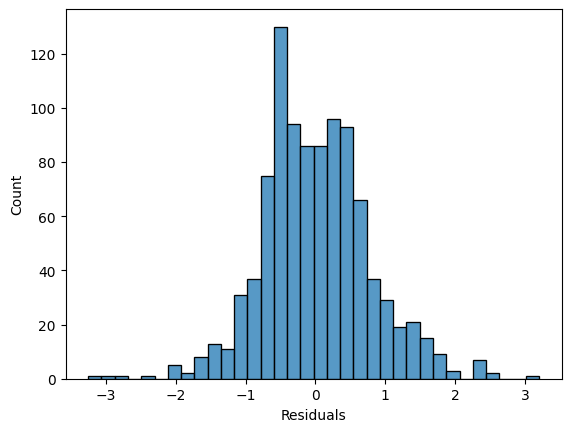

In [ ]:
import seaborn as sns

fig = sns.histplot(error)
plt.xlabel("Residuals")
plt.show()

Can you create a beter fitting model to predict earnings per share?

## Overfit Model

In [ ]:
from seaborn import regplot

In [ ]:
ct = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 9/forecast.xlsx', sheet_name="Complaints")

In [ ]:
AB = np.polyfit(ct["Period"], ct["Number of Complaints"], 2)
AB

array([-0.09905445,  1.92751196, 60.4254386 ])

In [ ]:
func = np.poly1d(AB)
y_p = func(ct["Period"])

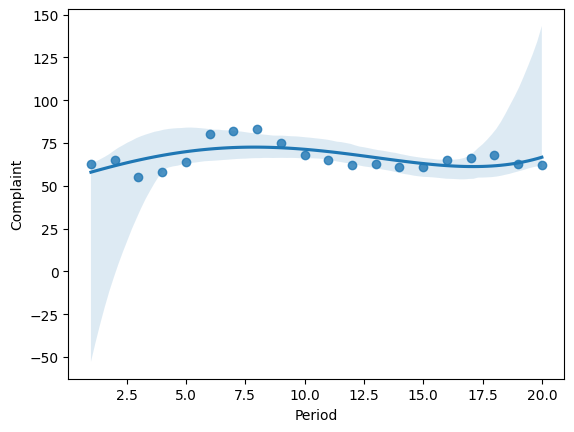

In [ ]:
regplot(x=ct["Period"], y=ct["Number of Complaints"], order=4)
plt.xlabel('Period')
plt.ylabel('Complaint')
plt.show()